In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
path = './resultados/benchmark_1/'
results_path = [f for f in listdir(path) if isfile(join(path, f)) and '.csv' in join(path, f) ]
len(results_path)

50

In [3]:
df = None
for result_path in results_path: 
    if df is None:
        df = pd.read_csv(join(path, result_path), sep=';',header=None)
        df.columns = ['Tamanho', 'Tempo Malloqueiro', 'Tempo Malloc']
    else:
        df_t = pd.read_csv(join(path, result_path), sep=';',header=None)
        df_t.columns = ['Tamanho', 'Tempo Malloqueiro', 'Tempo Malloc']
        df['Tempo Malloqueiro'] = df['Tempo Malloqueiro'] + df_t['Tempo Malloqueiro']
        df['Tempo Malloc'] = df['Tempo Malloc'] + df_t['Tempo Malloc']

df['Tempo Malloqueiro'] = df['Tempo Malloqueiro'] / len(results_path)
df['Tempo Malloc'] = df['Tempo Malloc'] / len(results_path)
df

,Tamanho,Tempo Malloqueiro,Tempo Malloc
0,1024,0.018500,0.00418
1,2048,0.019820,0.00542
2,3072,0.022420,0.00786
3,4096,0.024440,0.00986
4,5120,0.029480,0.01238
...,...,...,...
995,1019904,3.052719,2.93676
996,1020928,3.157240,2.90452
997,1021952,3.098240,2.91968
998,1022976,3.058900,2.92862


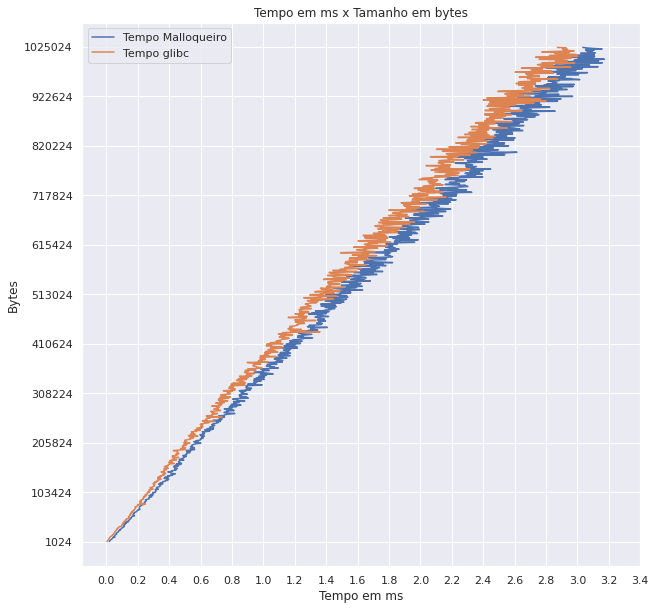

In [4]:
sns.set_theme()
plt.figure(figsize=(10,10), facecolor='white')
plt.plot(df['Tempo Malloqueiro'], df['Tamanho'], label='Tempo Malloqueiro')
plt.plot(df['Tempo Malloc'], df['Tamanho'], label='Tempo glibc')
plt.xticks(np.arange(0,int(max(df['Tempo Malloqueiro'].max(),df['Tempo Malloc'].max()))+0.6, 0.2))
plt.yticks(np.arange(1024,1024000+1025, 1024)[::100])
plt.ticklabel_format(style='plain')
plt.ylabel('Bytes')
plt.xlabel('Tempo em ms')
plt.title('Tempo em ms x Tamanho em bytes')
plt.legend()
plt.savefig('resultados/grafico_1.png', dpi=500)
plt.show()

In [5]:
# Tempo de alocação do malloqueiro de 1024 até 1024000 bytes a cada 1024 bytes de forma SEQUENCIAL
df_bench_3 = pd.read_csv('./resultados/benchmark_3/resultado.csv', sep=';',header=None)

# Tempo de alocação do malloqueiro de 1024 até 1024000 bytes a cada 1024 bytes de forma PARALELA
df_bench_4 = pd.read_csv('./resultados/benchmark_4/resultado.csv', sep=';',header=None)

# Tempo de alocação do malloc do glibc de 1024 até 1024000 bytes a cada 1024 bytes de forma PARALELA
df_bench_5 = pd.read_csv('./resultados/benchmark_5/resultado.csv', sep=';',header=None)

# Tempo de alocação do malloc do glibc de 1024 até 1024000 bytes a cada 1024 bytes de forma SEQUENCIAL
df_bench_6 = pd.read_csv('./resultados/benchmark_6/resultado.csv', sep=';',header=None)

medias_alocacoes_sequenciais = {
    'Malloqueiro': df_bench_4.mean().to_list()[0],
    'glibc': df_bench_6.mean().to_list()[0]
}

medias_alocacoes_paralelas = {
    'Malloqueiro': df_bench_4.mean().to_list()[0],
    'glibc': df_bench_5.mean().to_list()[0]
}
medias_alocacoes_sequenciais, medias_alocacoes_paralelas

({'Malloqueiro': 532.254883422848, 'glibc': 477.78361572265794},
 {'Malloqueiro': 532.254883422848, 'glibc': 614.4626794433501})

In [6]:
porcentagem_do_malloqueiro_em_relacao_ao_malloc_sequencial = (medias_alocacoes_sequenciais['Malloqueiro'] / medias_alocacoes_sequenciais['glibc'] * 100) - 100
porcentagem_do_malloqueiro_em_relacao_ao_malloc_sequencial

11.400823700871612

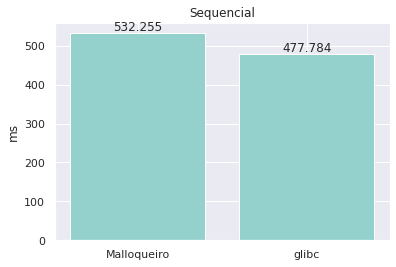

In [7]:
keys = medias_alocacoes_sequenciais.keys()
vals = medias_alocacoes_sequenciais.values()

plt.bar(keys, vals, color='#95D1CC')

plt.ylabel('ms')
# plt.xlabel('Algoritmo')
plt.xticks(list(keys))
plt.title('Sequencial')
ax = plt.gca()
plt.bar_label(ax.containers[0])

plt.savefig('resultados/grafico_2.png', dpi=500)
plt.show()

In [8]:
porcentagem_do_malloqueiro_em_relacao_ao_malloc_paralelo = (medias_alocacoes_paralelas['Malloqueiro'] / medias_alocacoes_paralelas['glibc'] * 100) - 100
porcentagem_do_malloqueiro_em_relacao_ao_malloc_paralelo

-13.378810263135136

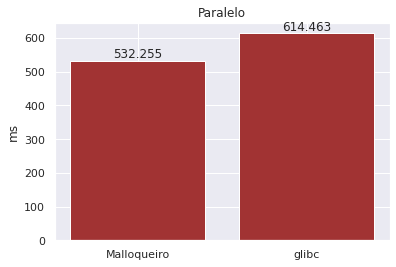

In [9]:
keys = medias_alocacoes_paralelas.keys()
vals = medias_alocacoes_paralelas.values()

plt.bar(keys, vals, color='#A13333')

plt.ylabel('ms')
# plt.xlabel('Algoritmo')
plt.xticks(list(keys))
plt.title('Paralelo')
ax = plt.gca()
plt.bar_label(ax.containers[0])

plt.savefig('resultados/grafico_3.png', dpi=500)
plt.show()